## Introduction 

Customer satisfaction is an essential lever to achieve profitability. To do this, actions are taken to satisfy and especially retain customers. Monitoring and evaluation is essential in this case. As a result, indicators are put in place to best reflect the situation. One of its indicators is the churn rate.
It reflects the percentage of customers who no longer use the services of a company over a given period.
We will study a use case with the data of a company delivering services related to phone and internet. Our aim is to do an exploratory data analysis and build a model to predict the churn rate.

### Description of the data set

In [1]:
#Importation of Libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Importation of data from a local place
#Data is available on https://www.kaggle.com/radmirzosimov/telecom-users-dataset

data = pd.read_csv("telecom_users.csv")
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


#### Shape and Missing values 

In [3]:
#Shape of the data set
data.shape

(5986, 22)

In [4]:
data.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The dataset contains 5986 users described by 21 variables with no missing values. The "Unnamed: 0" will be drop for the need of the analysis because we do not have information about it.

In [5]:
#Drop "Unnamed: 0" column
data = data.drop(columns=["Unnamed: 0","customerID"])
data.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

#### Data Types 

In [6]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges must be in a numerical type. So that, we have to convert into a numeric form (float).

In [7]:
data["TotalCharges"].value_counts().head()

20.2     10
         10
19.75     8
19.55     7
20.05     6
Name: TotalCharges, dtype: int64

In [8]:
data[data.tenure == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Customers with TotalCharges column empty are new client. The tenure column is equal to 0 for all of them. So, we will impute these empty values by the cost of their current subscription. Then, we'll convert the type of TotalCharges variable into float datatype.

In [9]:
data.loc[data.TotalCharges == " ","TotalCharges"] = data.loc[data.TotalCharges == " ","MonthlyCharges"]

In [10]:
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [11]:
data[data.tenure == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,19.85,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75,No


In [12]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Demographics characteristics of users

1. Repartition per gender

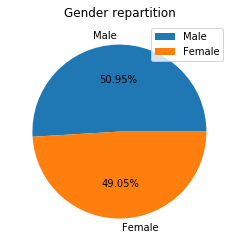

In [13]:
plt.pie(x=data.gender.value_counts(),labels=data.gender.value_counts().index,autopct='%1.2f%%')
plt.title("Gender repartition")
plt.legend()
plt.show()

Our users population is quite balanced. We have 2% more men than woman.

In [14]:
#Create a new variable which recod churn state Yes = 1 , No = 0
def churn_guesser(row):
    if row["Churn"] == "Yes":
        return 1
    else:
        return 0

data["Churn_Recod"] = data.apply(churn_guesser,axis=1)

In [15]:
round(100 * data.pivot_table(index="gender",values="Churn_Recod", aggfunc = np.mean),2)

,Churn_Recod
gender,
Female,26.94
Male,26.10


The behaviour of churn seems not to be related to gender (Female: **26.94%**, Male: **26.10%**). The churn rate by sex category is quite similar to the global one. The sex doest not influence the churn behaviour.

2. Marital and dependent status

Churn,No,Yes
Partner,,
No,67.20,32.80
Yes,80.17,19.83


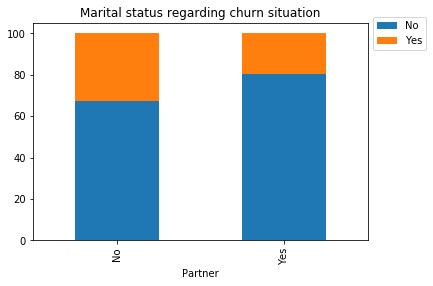

In [16]:
table1 = pd.crosstab(data.Partner,data.Churn)
table1 = round(100*(table1.div(table1.sum(axis=1),axis=0)),2)
table1.plot(kind="bar",stacked=True)
plt.title("Marital status regarding churn situation")
plt.legend(bbox_to_anchor=(1,1.05))
table1

The marital status has an effect on the churn behaviour as shown by the previous table. The churn rate is **19,83%** for customer who has a partner against **32,80%** for single client.

Churn,No,Yes
Dependents,,
No,68.87,31.13
Yes,84.31,15.69


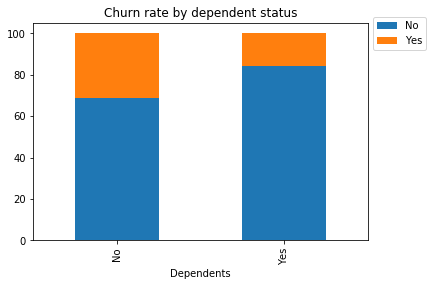

In [17]:
table2 = pd.crosstab(data.Dependents,data.Churn)
table2 = round(100*(table2.div(table2.sum(axis=1),axis=0)),2)
table2.plot(kind="bar",stacked=True)
plt.title("Churn rate by dependent status")
plt.legend(bbox_to_anchor=(1,1.05))
table2

Churn rate is higher in the group of customer who has not dependents. Customers with relatives could not be only or direct user of subscribed services. This can explained the lower churn rate in this group (**15,69%**).

3. Situation regarding to work activity and dependents status

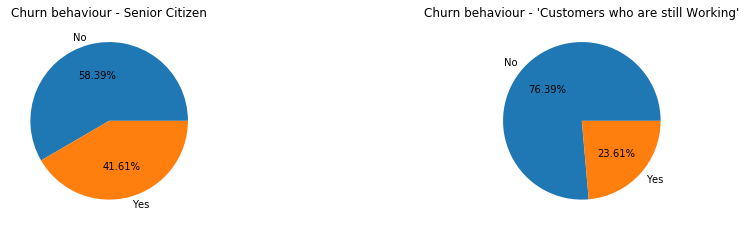

In [1576]:
plt.figure(figsize=(12,8))
SC1 = data.loc[data.SeniorCitizen == 1]
SC0 = data.loc[data.SeniorCitizen == 0]

plt.subplot(1,3,1)
plt.pie(x=SC1.Churn.value_counts(),labels=SC1.Churn.value_counts().index, autopct='%1.2f%%')
plt.title("Churn behaviour - Senior Citizen")

plt.subplot(1,3,3)
plt.pie(x=SC0.Churn.value_counts(),labels=SC0.Churn.value_counts().index, autopct='%1.2f%%')
plt.title("Churn behaviour - 'Customers who are still Working'")

plt.show()

According to this figure, the risk of churn increases when we pass to the group of user who's still working to the senior citizen. 

In [1577]:
px.box(x='SeniorCitizen',y='TotalCharges',data_frame=data,title="Repartition of total charges according Senior status")

The fact that people who aren't working have more probability of churn can be explained by the cost of choosen services. Indeed, by comparing the median of total charges, the charges of senior citizen is higher than user who still working. Because some of them do not have a regular source of income(salary) this cost can't be handle for a long time.

### Analysis of subscribed services

* Contract and method of payment

Before using a service, in general,customer has to sign a contract with the company which deliver this service. This contract can describe the way of payment and others informations.

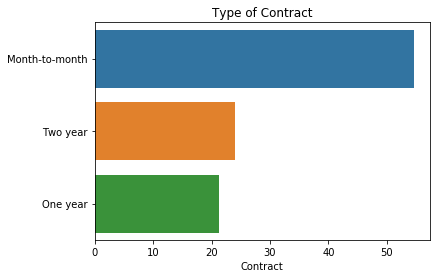

In [1578]:
sns.barplot(y=data.Contract.value_counts().index, x=100*data.Contract.value_counts()/data.Contract.value_counts().sum())
plt.title("Type of Contract")
plt.show()

More than the half of the users has "Month-to-Month" contract. The second most used contract type is the "Two year" formula with more than one over five customer who uses it.

                              Churn behaviour by contract type


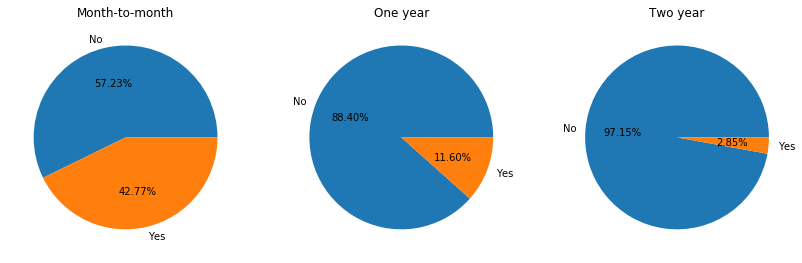

In [1579]:
contract = np.unique(data.Contract).tolist()
i = 0
print('                              Churn behaviour by contract type')
plt.figure(figsize=(14,8))
for c in contract:
    i=i+1
    plt.subplot(1,len(contract),i)
    df = data.loc[data.Contract == c]
    plt.pie(x=df.Churn.value_counts(),labels=df.Churn.value_counts().index, autopct='%1.2f%%')
    plt.title(c)
    


plt.show()

The churn rate decreases with the duration of the contract choosen by the customer.Two over five customers who have choosen a Month-to-Month contract have churned against less than 3% for Two-year contract type. 
A Month-to-Month contract gives more control to the customers.They can end it more easily than the others type due to the period of application.

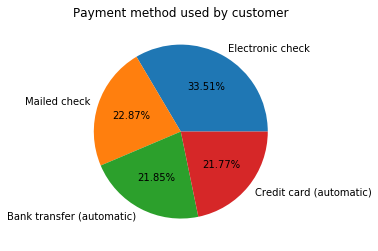

In [1580]:
plt.pie(x=data.PaymentMethod.value_counts(),labels=data.PaymentMethod.value_counts().index,autopct='%1.2f%%')
plt.title('Payment method used by customer')
plt.show()

Churn,Yes,No
PaymentMethod,,
Bank transfer (automatic),17.0,83.0
Credit card (automatic),15.0,85.0
Electronic check,45.0,55.0
Mailed check,19.0,81.0


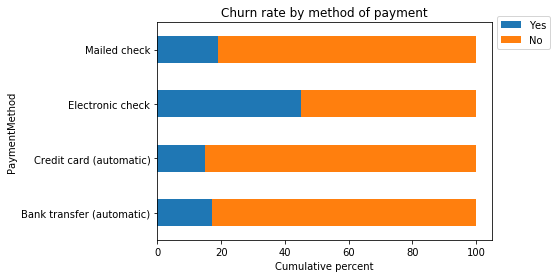

In [1581]:
tab = pd.crosstab(data.PaymentMethod,data.Churn)
tab = 100*round(tab.div(tab.sum(axis=1),axis=0),2)
tab = tab[["Yes","No"]]
tab.plot(kind="barh",stacked=True)
plt.legend(bbox_to_anchor=(1,1.05))
plt.title("Churn rate by method of payment")
plt.xlabel("Cumulative percent")
tab

The most used method of payment is the "Electronic check method" (**33,51%** of the customer uses it). Regarding the churn rate by the method of payment shows that the way of payment influences its variation.

* Tenure

In [1582]:
data.tenure.describe()

count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

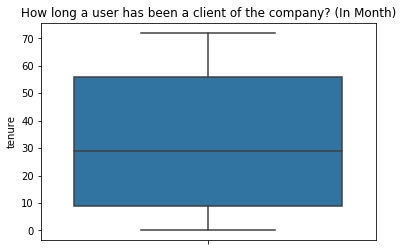

In [1583]:
sns.boxplot(y='tenure',data=data,orient='v')
plt.title("How long a user has been a client of the company? (In Month)")
plt.show()

If they churned or not, client uses company's services for a mean period of **33 months**. Some client have newly used company services when another have 72 months (**6 years**) of seniority and one user over 2 has been a client of the company since less than **29 months**.

   Users can choose if they want Phone Service or Internet Service or both of them. Phone service includes the possibility to have mutltiple Lines and Internet services which contains : *online security, online backup, device protection and Tech support.*

* Phone Service

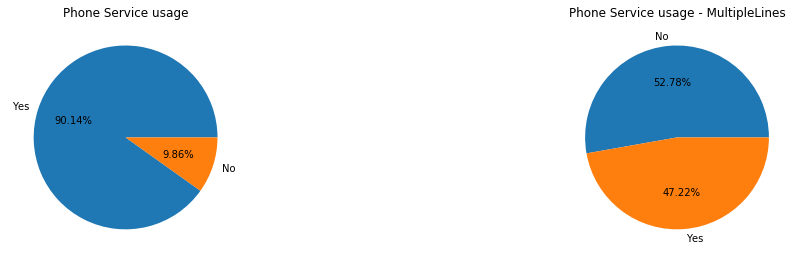

In [1584]:
plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
plt.pie(x=data.PhoneService.value_counts(),labels=data.PhoneService.value_counts().index,autopct='%1.2f%%')
plt.title('Phone Service usage')

#The second pie chart uses only customers data who have a Phone Service.
plt.subplot(1,3,3)
plt.pie(x=data.loc[data.PhoneService == 'Yes'].MultipleLines.value_counts(),labels=data.loc[data.PhoneService == 'Yes'].MultipleLines.value_counts().index,autopct='%1.2f%%')
plt.title('Phone Service usage - MultipleLines')
plt.show()

Phone Service is used by 9 over 10 customers and more than 4 of them have a multiple line.

* Internet Service

In [1585]:
def Number_Internet_Services(row):
    #We retrieve all the columns corresponding to Internet Services
    Internet_Services = data.columns.tolist()[8:14]
    i=0
    for col in Internet_Services:
        if row[col] == "Yes":
            i = i+1
        else:
            i = i   
    return i

#Creating a new column describing the number of subscribed service related to Internet Service
data['Nb_Subscribed_IntServ'] = data.apply(Number_Internet_Services,axis=1)

In [1586]:
#e will create a dataframe with onlythe columns related to service attached to Internet Services.
#This dataframe willbe used for making a stacked bar
InternetService = data.loc[data.InternetService != "No"]
InternetService = InternetService[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

#recod = {'Yes':1,'No':0}
freq = {}

for col in InternetService.columns.tolist():
    freq[col] = InternetService[col].value_counts()

plotdata = pd.DataFrame(freq)
#First dataframe got is on the wrong shape. We have to transpose it for having the column's name as label for axis.
plotdata = plotdata.transpose()

plotdata1 = round(100 * plotdata.div(plotdata.sum(axis=1),axis=0),1)

In [1587]:
plotdata

,No,Yes
OnlineSecurity,2982,1713
OnlineBackup,2605,2090
DeviceProtection,2640,2055
TechSupport,2960,1735
StreamingTV,2389,2306
StreamingMovies,2356,2339


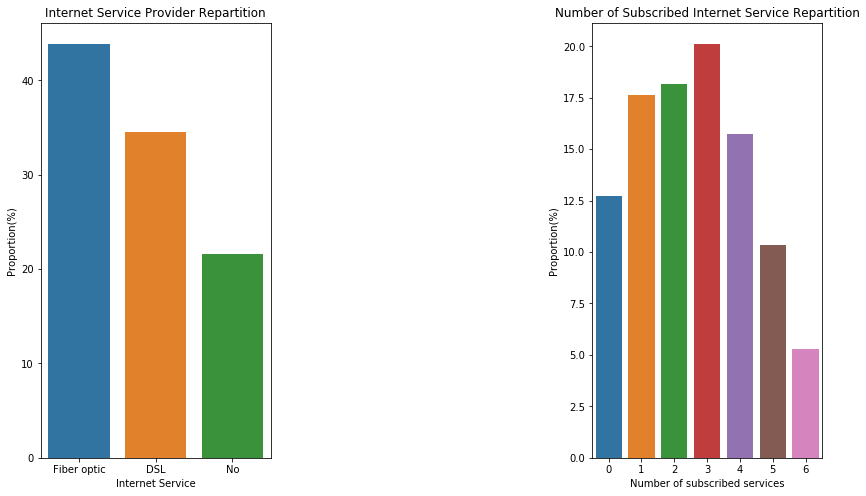

In [1588]:
plt.figure(figsize=(14,8))

plt.subplot(1,3,1)
sns.barplot(x=data.InternetService.value_counts().index,y=100*data.InternetService.value_counts()/data.InternetService.value_counts().sum())
plt.xlabel("Internet Service")
plt.ylabel("Proportion(%)")
plt.title('Internet Service Provider Repartition')

plt.subplot(1,3,3)
sns.barplot(x=data.loc[data.InternetService != "No"].Nb_Subscribed_IntServ.value_counts().index,y=100*(data.loc[data.InternetService != "No"].Nb_Subscribed_IntServ.value_counts()/data.loc[data.InternetService != "No"].Nb_Subscribed_IntServ.value_counts().sum()))
plt.title('Number of Subscribed Internet Service Repartition')
plt.xlabel("Number of subscribed services")
plt.ylabel("Proportion(%)")


plt.show()

Fiber optic is the most used internet service. More than 2 over 5 of customers uses this service. This graph also shows that **20%** of the customers has only subscribed to a Phone Service.


Some services are derived from Internet Service. Customers who subscribed to an Internet Service can access to them.They are six services concerned. The most used of them are Stream services (Movies (**49.1%**) and (**49.8%**))  . The number of customer increases up to three services and after decreases. This can be explained by the cost attached to number of service. But, it is better to observe that some users has subscribed to all services related to Internet service.

In [1589]:
plotdata1

,No,Yes
OnlineSecurity,63.5,36.5
OnlineBackup,55.5,44.5
DeviceProtection,56.2,43.8
TechSupport,63.0,37.0
StreamingTV,50.9,49.1
StreamingMovies,50.2,49.8


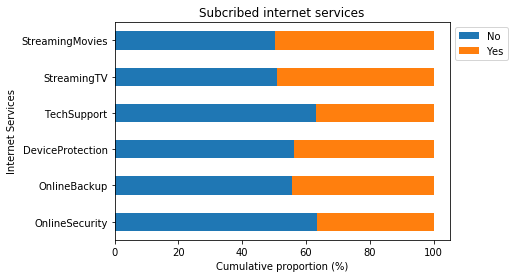

In [1590]:
plotdata1.plot(kind="barh",stacked=True)
plt.xlabel("Cumulative proportion (%)")
plt.ylabel("Internet Services")
plt.title('Subcribed internet services')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

* Services regarding churn behaviour

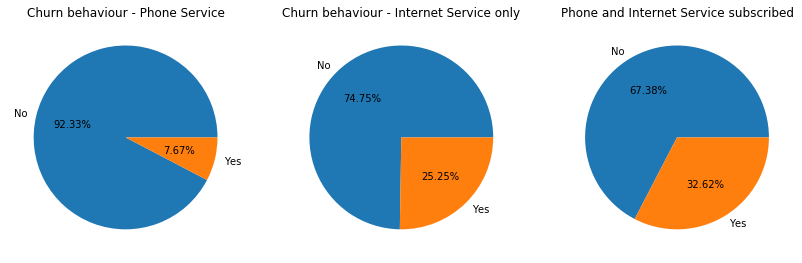

In [1591]:
#Evolution of churn rate regarding if customer has phone service or internet service or both of them.
plt.figure(figsize=(14,6))

plt.subplot(1,3,1)
PhoneOnly = data.loc[(data.PhoneService == "Yes")&(data.InternetService == "No")]
plt.pie(x=PhoneOnly.Churn.value_counts(),labels=PhoneOnly.Churn.value_counts().index,autopct="%1.2f%%")
plt.title("Churn behaviour - Phone Service")

plt.subplot(1,3,2)
InterntOnly = data.loc[(data.PhoneService == "No")&(data.InternetService != "No")]
plt.pie(x=InterntOnly.Churn.value_counts(),labels=InterntOnly.Churn.value_counts().index,autopct="%1.2f%%")
plt.title("Churn behaviour - Internet Service only")

plt.subplot(1,3,3)
Phone_Internet = data.loc[(data.PhoneService == "Yes")&(data.InternetService != "No")]
plt.pie(x=Phone_Internet.Churn.value_counts(),labels=Phone_Internet.Churn.value_counts().index,autopct="%1.2f%%")
plt.title("Phone and Internet Service subscribed")

plt.show()

We note that the risk of churn goes up with the number of subscribed Service. It goes up to **32,62%** for clients who have both phone and internet services.

In [1592]:
#Table describing the the churn rate by number of subscribed
Crosstab_Nb_subscribed_Serv= data.loc[data.InternetService != "No"].groupby("Nb_Subscribed_IntServ").mean()[["tenure","Churn_Recod"]]
Crosstab_Nb_subscribed_Serv['Churn_Rate'] = 100*Crosstab_Nb_subscribed_Serv['Churn_Recod']
Crosstab_Nb_subscribed_Serv = Crosstab_Nb_subscribed_Serv.drop(columns=["Churn_Recod"])
Crosstab_Nb_subscribed_Serv = round(Crosstab_Nb_subscribed_Serv,2)
Crosstab_Nb_subscribed_Serv

,tenure,Churn_Rate
Nb_Subscribed_IntServ,,
0,10.15,53.18
1,17.08,45.10
2,26.30,34.35
3,36.47,27.62
4,47.45,22.63
5,55.28,12.76
6,64.92,5.65


The previous table show that the more the subscribed service is the lower the churn rate is. The number of subscribed srvice can be such an indicator for the company.

### Training a model for the prediction of churn rate by using Logistic Regression

Predict the churn rate, supposed to build a model which will be trained and tested on the current data.
We predict a behaviour represents by two output : knowing if the customer will churn or not. So that, we are in a classification issue.
Some model are using to solve such a problem. We'll using one of them : Logistic Regression.

First, we'll prepare the data by split them into test and train data. Then, learn from the train data and apply the model on the test data. Finally, we'll check some measure in order to know how best the model is.

#### Preparation of data

The dataset has some variable which are not numeric. These categorical variable will be transformed into dummies variables.

In [1593]:
recod = {"Yes":1 ,"No":0}
var_recod = ["Partner","Dependents","PhoneService","PaperlessBilling"]

for var in var_recod:
    data[var] = data[var].replace(recod)

#Delete gender column because this variable does not influence churn behaviour.
#Delete Nb_Subscribed_IntServ column because it's a linear combination of 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
#Delete Churn because we already have Churn_Recod

data.drop(columns=["gender","Nb_Subscribed_IntServ","Churn"],inplace=True)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Recod
0,0,1,1,72,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,0,0,0,44,1,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.20,0
2,1,1,0,38,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,0,0,0,4,1,No,DSL,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.50,0
4,0,0,0,2,1,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Electronic check,53.45,119.50,0


In [1594]:
#Data type of dataset's variable
col_type = data.dtypes
col_type

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn_Recod           int64
dtype: object

In [1595]:
#We've filtering all categorical columns of the data set and transform it into a list named obj_col
obj_col = col_type[col_type == "object"].index.tolist()
obj_col

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [1596]:
#We transform the categorical data got into dumiies variable
df_var_dummies = pd.get_dummies(data[obj_col])
df_var_dummies.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0


In [1597]:
#Getting column's name of categorical data
num_col = col_type[col_type != "object"].index.tolist()
num_col

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn_Recod']

In [1598]:
#Concatenate dataframe of dummy variable and numerical data
df_processed = pd.concat([data[num_col],df_var_dummies],axis=1)
df_processed.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_Recod,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,72,1,0,24.10,1734.65,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,0,0,44,1,1,88.15,3973.20,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,1,0,38,1,1,74.95,2869.85,1,0,...,1,0,0,1,0,0,1,0,0,0
3,0,0,0,4,1,1,55.90,238.50,0,1,...,0,0,1,1,0,0,0,0,1,0
4,0,0,0,2,1,0,53.45,119.50,0,1,...,1,0,0,1,0,0,0,0,1,0


#### Split of processed_df into df_train and df_test

In [1599]:
#Import the train_test_split used for split df_processed
from sklearn.model_selection import train_test_split

In [1600]:
df_train , df_test = train_test_split(df_processed,test_size = 0.2)

In [1601]:
print("------------------------------------------")
print("Processed , train and test dataframe shape")
print("------------------------------------------")
print("Processed dataset shape")
print(df_processed.shape)

print("Train dataset shape")
print(df_train.shape)

print("Test dataset shape")
print(df_test.shape)

------------------------------------------
Processed , train and test dataframe shape
------------------------------------------
Processed dataset shape
(5986, 40)
Train dataset shape
(4788, 40)
Test dataset shape
(1198, 40)


In [1603]:
#Computing churn rate by processed,train and test data frmae to see how these data set are balanced

print("-----------------------------------------------")
print("Processed , train and test dataframe churn rate")
print("-----------------------------------------------")

print(round(100*df_processed.Churn_Recod.mean(),2))
print(round(100*df_train.Churn_Recod.mean(),2))
print(round(100*df_test.Churn_Recod.mean(),2))

-----------------------------------------------
Processed , train and test dataframe churn rate
-----------------------------------------------
26.51
26.42
26.88


In [1604]:
#Getting name of features and target name for the model
input_list = df_train.columns.tolist()
del input_list[8] #Delete the target column into the name list of all the columns. Then,we'll get all the features columns name
output = "Churn_Recod"

In [1605]:
#All variable on train and test dataset have not the same scale. This can influence the computation. 
#We'll rescale them to avoid it.

#Training
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(df_train[input_list].values)
y_train = df_train.loc[:,output].values

#Test
X_test = sc.transform(df_test[input_list].values)
y_test = df_test.loc[:,output].values

* Training of the model and application on test data

In [1606]:
#Importation of the model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 0 , solver='lbfgs',max_iter=500)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [1607]:
#Test on df_test
y_test_predicted = lr_model.predict(X_test)

#### Evaluation of the model

For the evaluation of the model, the confusion matrix and classification report can be used. We will focus on the confusion matrix and present another method of validation which is a cross validation.

In [1608]:
print('The accuracy of the model is : ' + str(round(100*lr_model.score(X_test,y_test),2) ) +'%')

The accuracy of the model is : 80.8%


In [1609]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = pd.DataFrame(index=["y_pred_0","y_pred_1"],columns=["y_test_0","y_test_1"])
conf_matrix.loc[:,:] = confusion_matrix(y_test,y_test_predicted)
conf_matrix

,y_test_0,y_test_1
y_pred_0,794,82
y_pred_1,148,174


From this matrix, we can compute some rate : accuracy rate,misclassification,sensitivity(recall) and specificity.
These rate permit us to appreciate the way the model predict the churn behaviour.

In [1610]:
accuracy_rate = (794+174)/conf_matrix.values.sum()
misclassification_rate = (148+82)/conf_matrix.values.sum()

sensitivity = 174/(174+82)
specificity = 794/(794+148)

In [1611]:
print('================================')
print('Some rate from Confusion Matrix')
print('================================')
print("Accuracy : "+ str(round(100*accuracy_rate,2)) + "%")
print("Misclassification : "+ str(round(100*misclassification_rate,2)) + "%")
print("Sensitivity : "+ str(round(100*sensitivity,2)) + "%")
print("Specificity : "+ str(round(100*specificity,2)) + "%")

Some rate from Confusion Matrix
Accuracy : 80.8%
Misclassification : 19.2%
Sensitivity : 67.97%
Specificity : 84.29%


In [1612]:
from sklearn.metrics import classification_report
clr = classification_report(y_test,y_test_predicted)
print('======================')
print("Classification Report")
print('======================')
print(clr)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       876
           1       0.68      0.54      0.60       322

   micro avg       0.81      0.81      0.81      1198
   macro avg       0.76      0.72      0.74      1198
weighted avg       0.80      0.81      0.80      1198



In [1556]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr_model,X=sc.transform(df_processed[input_list].values),y=df_processed[output].values,cv=5)
score

array([0.80884808, 0.80801336, 0.79866332, 0.78947368, 0.80685619])

In [1613]:
print('======================')
print("Cross-validation Score")
print('======================')
print("Average cross_validation score : "+ str(100*round(score.mean(),2)) + "%")

Cross-validation Score
Average cross_validation score : 80.0%


In [1614]:
score.std()

0.007402611124899002

By using the cross validation (with 5 folds), we're increasing the accuracy. The processed dataframe is splitted into 5 datasets.Then, each of these dataset is used as a test set and the others as train set. So that, the model learn more and not only on one part of our processed data. The expected accuracy rate is : **80%**.

## Conclusion

Globally, the churn rate observed is around **26%**. The beahaviour of churn is influenced by : the cost associated to subscribed services(Total charges), some demographics characteristics (customer's still working or not). In order to minimize this rate, company can improve the customer experience on Internet Service which presents high churn rate (**25.25%**). The contract type also have an impact on churn rate. Company can favor annual or two year contract type to minimze that rate.